# Loading Libraries

In [ ]:

def View(df, rows=None, cols=None, width=None):
    """Displays the first `rows` of the DataFrame like R's View() by adjusting Pandas settings."""
    
    # Show only the first `rows` of the DataFrame
    with pd.option_context(
        "display.max_rows", rows,  # Limit number of rows shown
        "display.max_columns", cols,  # Show all columns
        "display.max_colwidth", width,  # Show full column width
        "display.expand_frame_repr", False  # Prevent column wrapping
    ):
        display(df.head(rows))  # Show only the first `rows`
import pickle
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File paths
fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/output/model_simple.pkl'
fp_val = '/gpfs/milgram/project/rtaylor/imc33/LOS/output/X_val_selected.csv'
lab_df = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/new_label_names.csv')

# Create rename dictionary from lab_df
rename_dict = pd.Series(lab_df.new_name.values, index=lab_df.old_name).to_dict()

# Load the model
with open(fp_simple, "rb") as f:
    model = pickle.load(f)

# Load dataset
X_test = pd.read_csv(fp_val, index_col='pat_enc_csn_id')

# Ensure feature order matches what the model expects
#X_test = X_test[model.feature_names_in_]

# Confirm features are identical
#print("Feature order matches:", list(model.feature_names_in_) == list(X_test.columns))

# Rename feature columns using rename_dict while ensuring uniqueness
X_test = X_test.rename(columns=rename_dict)

# Check for duplicate column names and resolve by appending a suffix
counts = {}
new_columns = []
for col in X_test.columns:
    if col in counts:
        counts[col] += 1
        new_columns.append(f"{col} ({counts[col]})")  # Append count to make unique
    else:
        counts[col] = 1
        new_columns.append(col)

X_test.columns = new_columns  # Update column names to be unique


# Calulate SHAP

In [ ]:
# Compute SHAP values
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
shap_values = explainer(X_test)  # Compute SHAP values

# Ensure SHAP values use the renamed features
shap_values.feature_names = X_test.columns.tolist()

# Importance DF

In [ ]:
# Calculate the mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Absolute SHAP': mean_abs_shap
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Mean Absolute SHAP', ascending=False)

importance_df

In [ ]:
df = importance_df.copy()

In [ ]:
filtered_df = df[df['Feature'].str.contains(r'count|volume|age', case=False, na=False, regex=True)]


In [ ]:
filtered_df = filtered_df[~filtered_df["Feature"].isin(["viz_insurance_Managed Medicare","viz_language_Other"])]

In [ ]:
filtered_df.to_csv("../output/numeric_features.csv", index=False)

In [ ]:
importance_df.to_csv("../output/all_features.csv", index=False)

# Beeswarm Plot

In [ ]:
# Generate the Beeswarm plot
fig_beeswarm = plt.figure(figsize=(20, 20))  # Adjusted figure size for beeswarm
shap.plots.beeswarm(shap_values, max_display=20, show=False)

# Show the plot
plt.show()

In [ ]:
shap.plots.bar(shap_values, max_display=20, show=False)

In [ ]:
plt.figure()
plt.subplot(1,2,1)
shap.plots.beeswarm(shap_values, max_display=10, show=False)
plt.subplot(1,2,2)
shap.plots.bar(shap_values, show=False)

# Optional for adjusting the margins:
plt.subplots_adjust(
    left=1,
    bottom=0.1, 
    right=3, 
    top=0.9,
    wspace=0.5   
)

In [ ]:
import numpy as np

# Compute sum of SHAP values for each row (i.e., observation)
shap_sums = shap_values.values.sum(axis=1)

# Find the index with the highest positive prediction
max_index = np.argmax(shap_sums)

print(f"Index with highest positive prediction: {max_index}")


In [ ]:
shap.force_plot(
    explainer.expected_value, shap_values[601].values, X_test.iloc[0, :], matplotlib=True
)

## Other Plots 
- age, consult counts, imaging counts, ed volume, hospital volume

In [ ]:
import shap
import matplotlib.pyplot as plt

# Extract feature names and SHAP values
feature_names = ["Consult Count", "Age", "Imaging Count", "ED Volume", "Inpatient Volume","US Count"]
                 
for feature in feature_names:
    shap.plots.scatter(shap_values[:, feature])

In [ ]:
import shap
import matplotlib.pyplot as plt

# Extract feature names and SHAP values
feature_names = ["Consult Count", "Age", "Imaging Count", "ED Volume", "US Count","Inpatient Volume"]

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

# Flatten the axes array for easy iteration
for ax, feature in zip(axes.flatten(), feature_names):
    shap.bplots.scatter(shap_values[:, feature], ax=ax)

plt.show()


# Log-Odds

In [1]:

def View(df, rows=None, cols=None, width=None):
    """Displays the first `rows` of the DataFrame like R's View() by adjusting Pandas settings."""
    
    # Show only the first `rows` of the DataFrame
    with pd.option_context(
        "display.max_rows", rows,  # Limit number of rows shown
        "display.max_columns", cols,  # Show all columns
        "display.max_colwidth", width,  # Show full column width
        "display.expand_frame_repr", False  # Prevent column wrapping
    ):
        display(df.head(rows))  # Show only the first `rows`
import pickle
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File paths
fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/output/model_simple.pkl'
fp_val = '/gpfs/milgram/project/rtaylor/imc33/LOS/output/X_val_selected.csv'
lab_df = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/new_label_names.csv')

# Create rename dictionary from lab_df
rename_dict = pd.Series(lab_df.new_name.values, index=lab_df.old_name).to_dict()

# Load the model
with open(fp_simple, "rb") as f:
    model = pickle.load(f)

# Load dataset
X_test = pd.read_csv(fp_val, index_col='pat_enc_csn_id')
y_test = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/output/X_val_selected.csv')

# Ensure feature order matches what the model expects
#X_test = X_test[model.feature_names_in_]

# Confirm features are identical
#print("Feature order matches:", list(model.feature_names_in_) == list(X_test.columns))

# Rename feature columns using rename_dict while ensuring uniqueness
X_test = X_test.rename(columns=rename_dict)

# Check for duplicate column names and resolve by appending a suffix
counts = {}
new_columns = []
for col in X_test.columns:
    if col in counts:
        counts[col] += 1
        new_columns.append(f"{col} ({counts[col]})")  # Append count to make unique
    else:
        counts[col] = 1
        new_columns.append(col)

X_test.columns = new_columns  # Update column names to be unique


In [35]:
y_test = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/output/y_val.csv', index_col='pat_enc_csn_id')
y_test = y_test.loc[X_test.index]


In [2]:
# Compute SHAP values
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
shap_values = explainer(X_test)  # Compute SHAP values

# Ensure SHAP values use the renamed features
shap_values.feature_names = X_test.columns.tolist()

In [37]:
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Define your bootstrap CI function
def bootstrap_shap_ci(shap_vals, n_boot=1000, alpha=0.05):
    means = []
    for _ in range(n_boot):
        sample = resample(shap_vals)
        means.append(np.mean(sample))
    lower = np.percentile(means, 100 * alpha / 2)
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

# Get SHAP values array and feature names
shap_array = shap_values.values  # (n_samples x n_features)
features = X_test.columns

# Initialize lists to store results
mean_shap = []
ci_lowers = []
ci_uppers = []

# Loop through each feature
for i, feat in enumerate(features):
    col_vals = shap_array[:, i]
    mean_shap.append(np.mean(col_vals))
    ci_low, ci_high = bootstrap_shap_ci(col_vals)
    ci_lowers.append(ci_low)
    ci_uppers.append(ci_high)

# Create DataFrame
impact_df = pd.DataFrame({
    'feature': features,
    'log_odds': mean_shap,
    'log_lower': ci_lowers,
    'log_upper': ci_uppers
}).sort_values(by='log_odds', key=np.abs, ascending=False)

impact_df

,feature,log_odds,log_lower,log_upper
3,Consult Count,-0.053837,-0.077462,-0.031967
166,Not Ready for Discharge_First,-0.040498,-0.059968,-0.021764
171,First Discharge Readiness (Monday),-0.009892,-0.011800,-0.008018
54,Discharged Home,-0.007526,-0.013002,-0.002461
167,"summary_first_rfd_status_Yes, with barriers",-0.006900,-0.008898,-0.004831
...,...,...,...,...
189,con_max_consult_note_creation_time_Morning,-0.000008,-0.001140,0.001017
15,con_service_geriatrics_count,-0.000006,-0.000387,0.000339
56,viz_ethnicity_Unknown,-0.000005,-0.000212,0.000153
113,First Bed Assigned Sunday,0.000003,-0.000578,0.000573


In [38]:
impact_df['or'] = np.exp(impact_df['log_odds'])
impact_df['or_lower'] = np.exp(impact_df['log_lower'])
impact_df['or_upper'] = np.exp(impact_df['log_upper'])

In [43]:
impact_df.sort_values(by='or', ascending=False)

,feature,log_odds,log_lower,log_upper,or,or_lower,or_upper,sig
25,Oncology Consult Count,0.006636,0.003846,0.009195,1.006658,1.003853,1.009238,True
187,summary_last_rfd_day_Mon,0.004291,0.003611,0.005036,1.004300,1.003618,1.005048,True
73,GI service,0.002840,0.000041,0.005766,1.002844,1.000041,1.005782,True
6,YM Provider Count,0.002831,0.001187,0.004642,1.002835,1.001187,1.004652,True
20,con_service_infectious_disease_count,0.002522,0.001763,0.003276,1.002525,1.001764,1.003281,True
...,...,...,...,...,...,...,...,...
167,"summary_first_rfd_status_Yes, with barriers",-0.006900,-0.008898,-0.004831,0.993124,0.991142,0.995181,True
54,Discharged Home,-0.007526,-0.013002,-0.002461,0.992502,0.987083,0.997542,True
171,First Discharge Readiness (Monday),-0.009892,-0.011800,-0.008018,0.990156,0.988269,0.992014,True
166,Not Ready for Discharge_First,-0.040498,-0.059968,-0.021764,0.960311,0.941795,0.978471,True


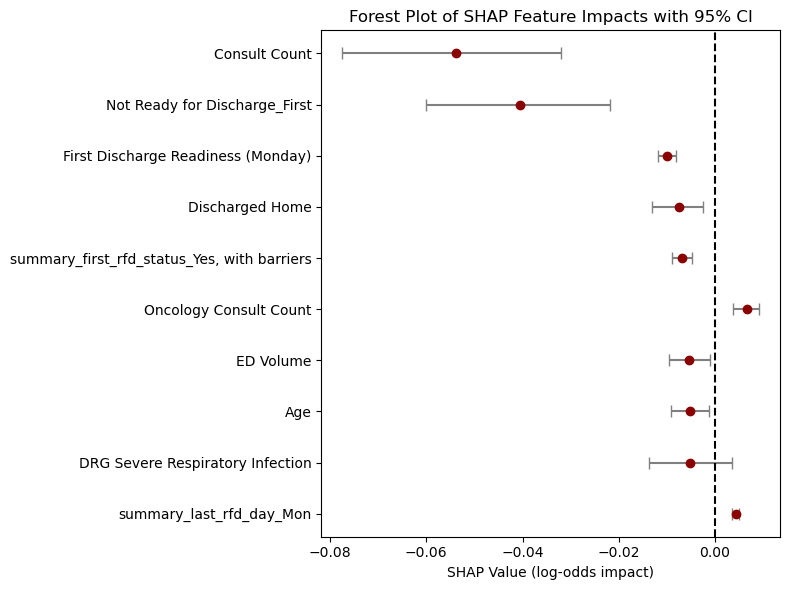

In [45]:
import matplotlib.pyplot as plt

# Select top N features
top_n = 10
df_plot = impact_df.sort_values(by='log_odds', key=np.abs, ascending=False).head(top_n)
df_plot = df_plot[::-1]  # flip for top-to-bottom order

# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    x=df_plot['log_odds'],
    y=df_plot['feature'],
    xerr=[df_plot['log_odds'] - df_plot['log_lower'],
          df_plot['log_upper'] - df_plot['log_odds']],
    fmt='o', color='darkred', ecolor='gray', capsize=4
)

plt.axvline(0, color='black', linestyle='--')
plt.xlabel('SHAP Value (log-odds impact)')
plt.title('Forest Plot of SHAP Feature Impacts with 95% CI')
plt.tight_layout()
plt.show()


In [46]:
impact_df.to_csv("../output/log_odds.csv", index=False)